# Fashion MNIST classification

Basic classification to identify type of clothings from a low-res 28x28 grayscale images.

## Setting up

In [1]:
# Use tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# Some other libraries
import numpy as np
import matplotlib.pyplot as plt

# the dataset library
import sys
sys.path.append('..')
from datasets import fashion_mnist

# Check the TensorFlow version
print(tf.__version__)

1.11.0


## The Data

Import FashionMNIST data and visualise it.

Load the data

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load()

print("Training data: {}".format(train_images.shape))
print("Test data: {}".format(test_images.shape))

Training data: (60000, 28, 28)
Test data: (10000, 28, 28)


Let's see how many categories they are:

In [3]:
classes = np.unique(train_labels)
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Let's plot one image

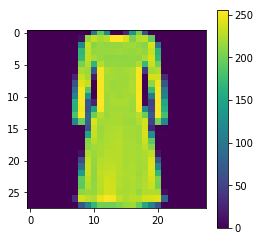

In [4]:
plt.rcParams['figure.figsize']=(4,4)
plt.imshow(train_images[np.random.randint(0, len(train_labels))])
plt.colorbar()

Normalize the image range

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Visualize some of the images.

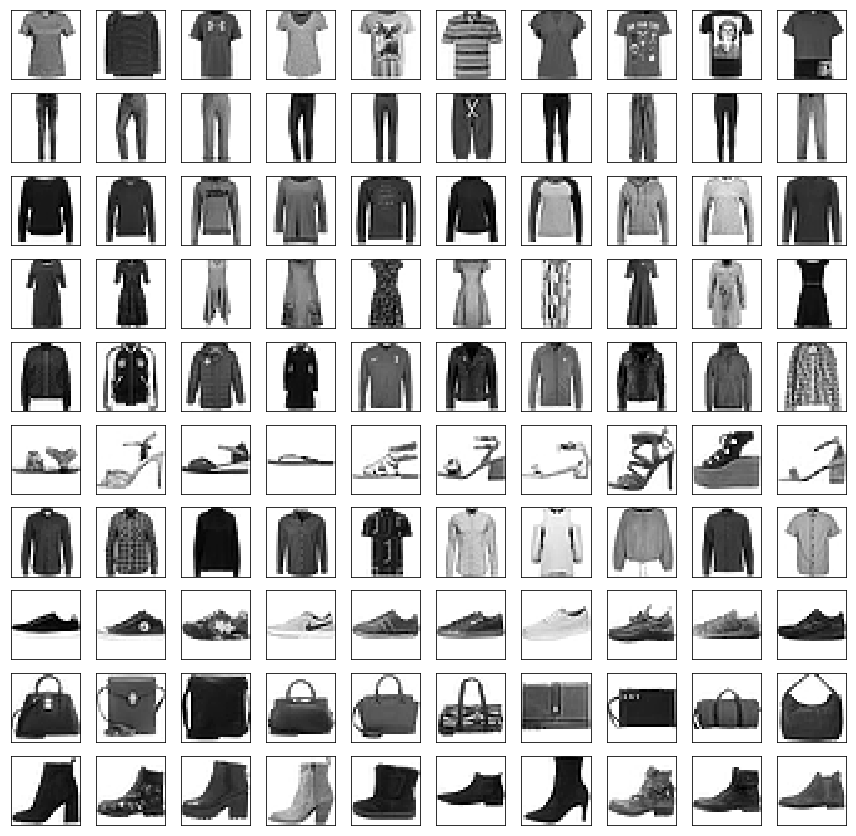

In [6]:
plt.rcParams['figure.figsize']=(15,15)
ncol = 10 

fig,ax = plt.subplots(nrows=len(classes), ncols=ncol)

for r in range(len(classes)):
    idx = np.random.choice(np.where(train_labels == classes[r])[0], size=ncol)
    
    for c in range(ncol):
        ax[r,c].imshow(train_images[idx[c]], cmap=plt.cm.binary)
        ax[r,c].set_xticks([])
        ax[r,c].set_yticks([])
        ax[r,c].grid(False)
    

Define the class names

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Build a simple model

The model consists of only 3 layers:

1. `Flatten`, which flattens the image matrix into a 1D array.
2. `Dense`, which is a fully-connected layer with 128 nodes (or neurons) with ReLU activation function that acts as feature extraction layer.
3. `Dense`, another one with 10 nodes (or neurons) with Softmax function that acts as probability score for each of the 10 classes.

In [8]:
simple_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Compile the model.

During the compilation, we need to define:

1. *Loss function*
2. *Optimizer*, we use the most popular one: Adam,
3. *Metrics*, which is going to be accuracy score.

In [9]:
simple_model.compile(optimizer=tf.train.AdamOptimizer(),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

## Train the model

In [10]:
simple_model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 7s 109us/step - loss: 0.5004 - acc: 0.8241
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.3771 - acc: 0.8641
Epoch 3/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.3377 - acc: 0.8771
Epoch 4/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.3140 - acc: 0.8847
Epoch 5/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2944 - acc: 0.8910
Epoch 6/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2796 - acc: 0.8962
Epoch 7/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2695 - acc: 0.9002
Epoch 8/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.2571 - acc: 0.9053
Epoch 9/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.2468 - acc: 0.9083
Epoch 10/20
60000/60000 [==============================] - 5s 88us/step - loss: 0.2397 - acc: 0.91

Test the accuracy by using test images

In [11]:
test_loss, test_acc = simple_model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 41us/step


In [12]:
print("Test accuracy: {}".format(test_acc))
print("Test loss: {}".format(test_loss))

Test accuracy: 0.8884
Test loss: 0.3541926041036844


## Prediction

In [13]:
preds = simple_model.predict(test_images)
preds.shape

(10000, 10)

Prediction contains array of probability scores for each 10 class. The maximum is the most confident one.

In [14]:
preds[5]

array([7.8771326e-13, 1.0000000e+00, 4.2666178e-14, 1.8061783e-15,
       5.9753971e-16, 4.6350955e-23, 2.2775626e-13, 4.1474610e-31,
       3.9876115e-18, 5.1187270e-19], dtype=float32)

Let's plot the prediction with labels. Blue = correct prediction, Red = wrong prediction.

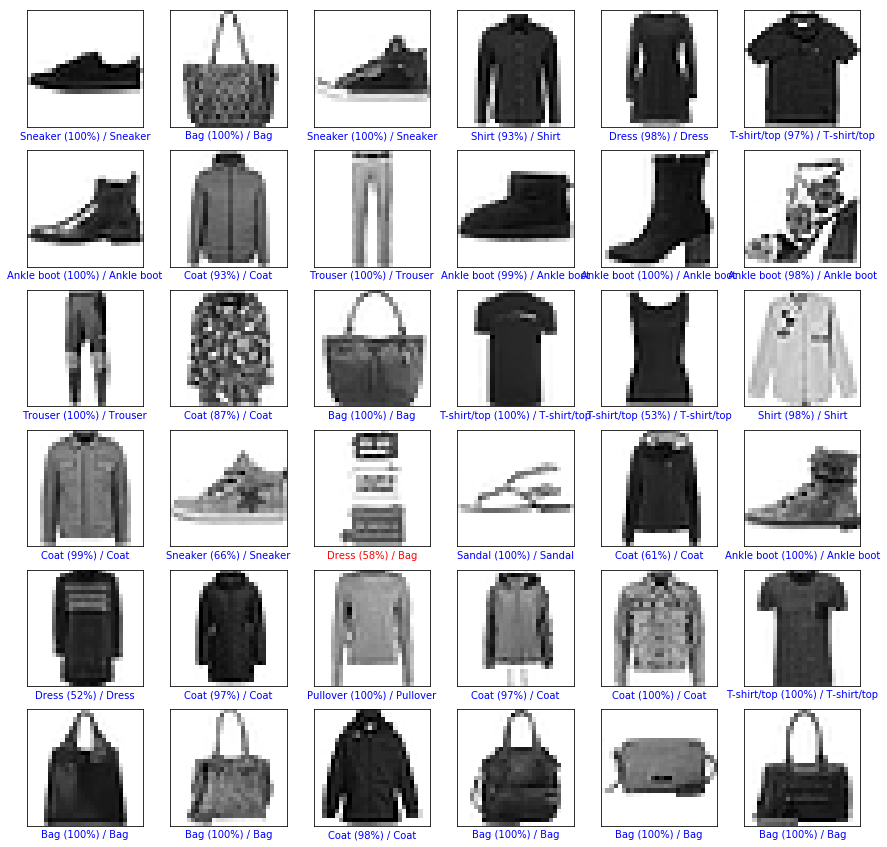

In [15]:
plt.rcParams['figure.figsize']=(15,15)

# pick randomly 36 test images
idx = np.random.choice(preds.shape[0], 36)

for i in range(len(idx)):
    plt.subplot(6, 6, i+1)
    
    plt.imshow(test_images[idx[i]], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # labeling
    j = np.argmax(preds[idx[i]])
    if j == test_labels[idx[i]]:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} ({:2.0f}%) / {}".format(
        class_names[j],
        preds[idx[i],j] * 100,
        class_names[test_labels[idx[i]]]
    ), color=color)